In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.TEMP.nc')
#plotvar = data.variables['TEMP'][0,:,:]
#lont = data.variables['TLONG']
#latt = data.variables['TLAT']

In [3]:

#lont = lont[342,520:700]
#latt = latt[342,520:650]
#plotvar = plotvar[:,342,520:700]
#plotvar[plotvar == -1.0] = np.nan


In [4]:
result = np.zeros((62,180,10))
i=0

In [5]:

months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,160)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[342,520:700]
        latt = latt[342,520:700]
        plotvar = plotvar[:,342,520:700]
        plotvar[plotvar == -1.0] = np.nan
        #aveplot = plotvar.mean(axis=0)
        #aveplot = aveplot.mean(axis=0)
        result[:,:,i] = plotvar[:,:]
        
        i = i + 1

In [6]:
tem = np.nanmean(result,axis=2)

In [7]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
A = data1.variables['z_t'][:]/100

In [9]:
result2 = np.zeros((62,180,10))

months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,160)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PD.nc')
        plotvar = data.variables['PD'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[342,520:700]
        latt = latt[342,520:700]
        plotvar = plotvar[:,342,520:700]
        plotvar[plotvar == -1.0] = np.nan
        #aveplot = plotvar.mean(axis=0)
        #aveplot = aveplot.mean(axis=0)
        result2[:,:,i] = plotvar[:,:]
        
        i = i + 1

In [10]:
PD = np.nanmean(result2,axis=2)
PD = (PD-1)*1000

In [11]:
#data2=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.PD.nc')
#PD = data2.variables['PD'][0,:,:]

In [12]:
#PD = PD[:,342,520:700]
#PD = (PD-1)*1000

In [13]:
lont

masked_array(data=[302.05, 302.15, 302.25, 302.35, 302.45, 302.55, 302.65,
                   302.75, 302.85, 302.95, 303.05, 303.15, 303.25, 303.35,
                   303.45, 303.55, 303.65, 303.75, 303.85, 303.95, 304.05,
                   304.15, 304.25, 304.35, 304.45, 304.55, 304.65, 304.75,
                   304.85, 304.95, 305.05, 305.15, 305.25, 305.35, 305.45,
                   305.55, 305.65, 305.75, 305.85, 305.95, 306.05, 306.15,
                   306.25, 306.35, 306.45, 306.55, 306.65, 306.75, 306.85,
                   306.95, 307.05, 307.15, 307.25, 307.35, 307.45, 307.55,
                   307.65, 307.75, 307.85, 307.95, 308.05, 308.15, 308.25,
                   308.35, 308.45, 308.55, 308.65, 308.75, 308.85, 308.95,
                   309.05, 309.15, 309.25, 309.35, 309.45, 309.55, 309.65,
                   309.75, 309.85, 309.95, 310.05, 310.15, 310.25, 310.35,
                   310.45, 310.55, 310.65, 310.75, 310.85, 310.95, 311.05,
                   311.15

In [14]:
lont.shape

(180,)

In [15]:
#A = np.arange(62)
#B = np.arange(180)
B=lont
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'13'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,70,100,130,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
### 130 white color

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'spacing'
  """


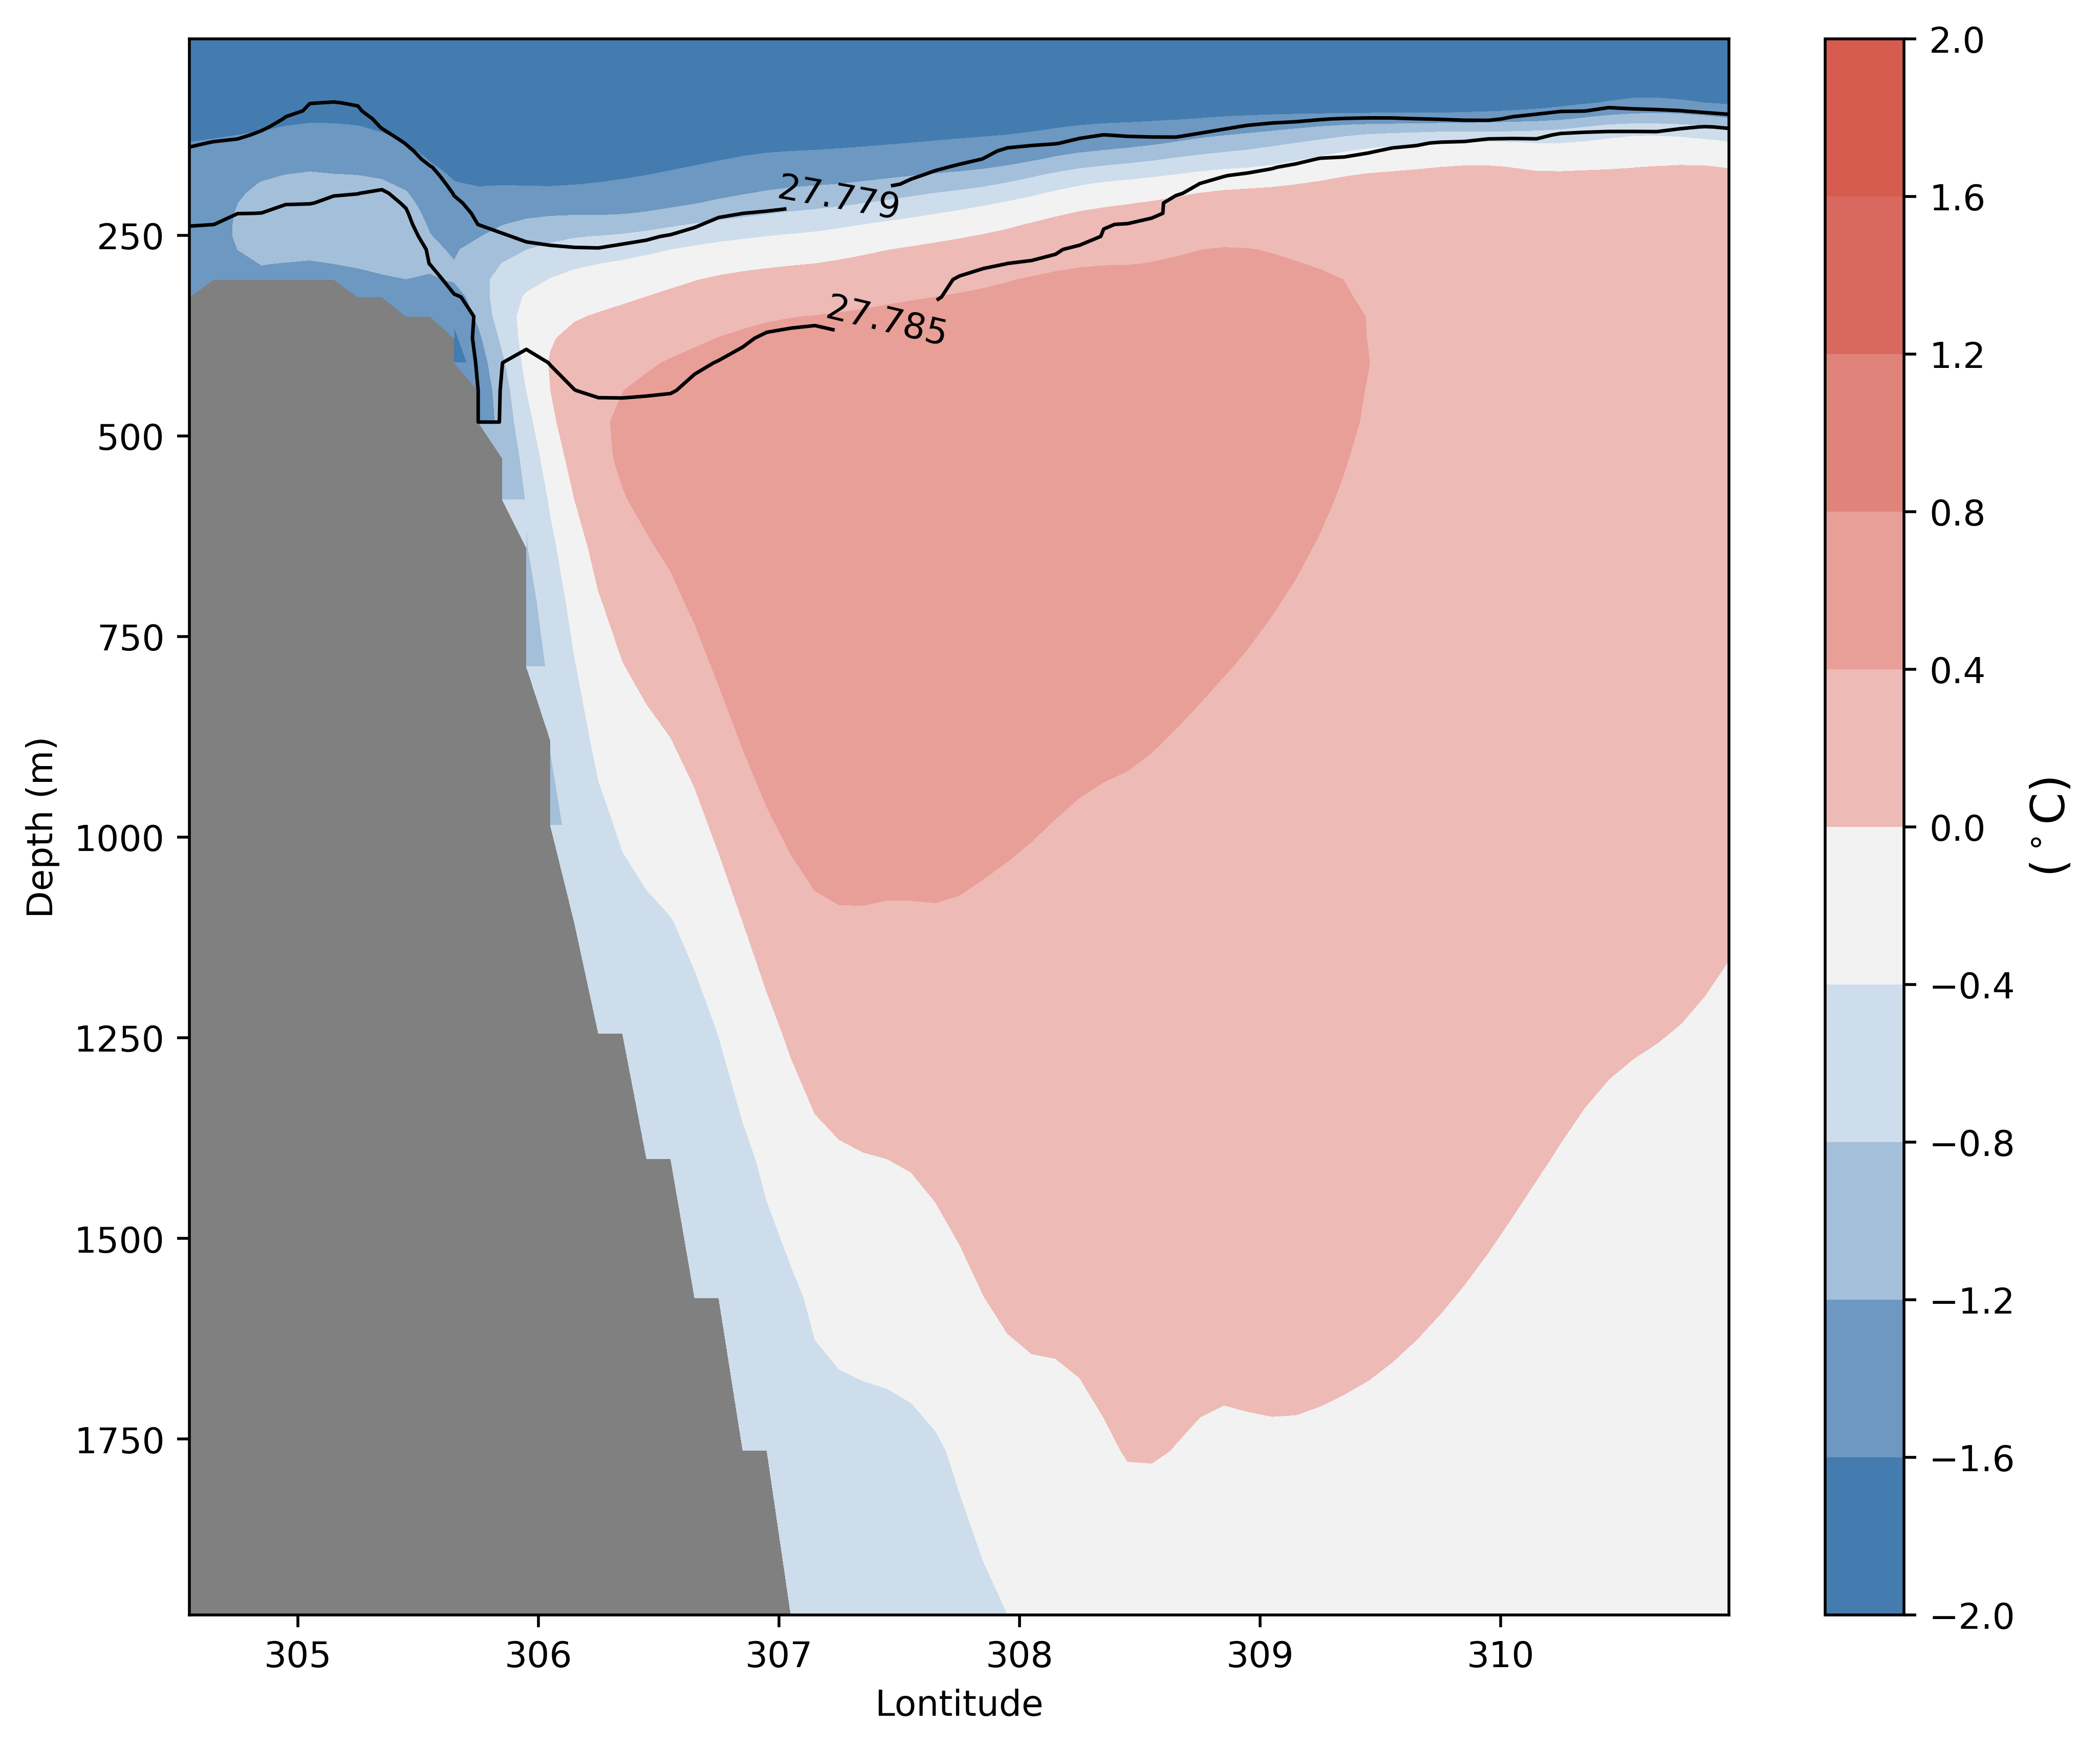

In [19]:
# plot the result
fig = plt.figure(figsize=(9.4, 7.7), dpi=500)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#im = ax0.contourf(xx, yy, plotvar,cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels)
im = ax0.contourf(xx[:46,25:90], yy[:46,25:90], tem[:46,25:90],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels)
CS = ax0.contour(xx[:46,25:90], yy[:46,25:90], PD[:46,25:90],[27.779,27.785],colors = 'black', linestyles = 'solid',linewidths=1)
ax0.set_facecolor("grey")
plt.clabel(CS, inline=1, fontsize=10)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.set_label('($^\circ$C)', **my_font)
#ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
#plt.xticks(range(0,141,20), ['0', '20', '40', '60', '80','100','120', '140'])
#plt.yticks(range(0,46,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968'])#,'3133','4375','5625'])
plt.xlabel('Lontitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
#ax0.set_title('Lontitude (60$^\circ$W ~ 45$^\circ$W ) ,  Latitude(64$^\circ$S),  Time(118-09)')
plt.savefig("v-cross300-09.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
PD

In [ ]:
PD.min()